In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the cleaned data
data1 = pd.read_csv('../DataSets/Principal_Commodity_Wise_Export/2014-2015.csv')
data2 = pd.read_csv('../DataSets/Principal_Commodity_Wise_Export/2015-2016.csv')
data3 = pd.read_csv('../DataSets/Principal_Commodity_Wise_Export/2016-2017.csv')
data4 = pd.read_csv('../DataSets/Principal_Commodity_Wise_Export/2017-2018.csv')

In [3]:
data1.head()

,COMMODITY,UNIT_CODE,COUNTRY,QTY,VALUES (US$ million)
0,OTHER COMMODITIES,NaN,UNSPECIFIED,NaN,371.280801
1,OTHER COMMODITIES,NaN,KENYA,NaN,18.251164
2,OTHER COMMODITIES,NaN,TANZANIA REP,NaN,21.844100
3,OTHER COMMODITIES,NaN,UGANDA,NaN,8.034605
4,OTHER COMMODITIES,NaN,BENIN,NaN,1.812666


<h1> Commodity wise analysis of Revenue. </h1>

In [4]:
# Commodity wise total revenue generated for 4 years
revenue_total1 = data1[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total2 = data2[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total3 = data3[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total4 = data4[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

In [5]:
# Total revenue generated in 4 years
total_revenue  = pd.DataFrame(
    data = {
        'Years' : ['2014-2015', '2015-2016', '2016-2017', '2017-2018'],
        'Revenue' : [
            data1['VALUES (US$ million)'].sum(),
            data2['VALUES (US$ million)'].sum(),
            data3['VALUES (US$ million)'].sum(),
            data4['VALUES (US$ million)'].sum()
        ]
    }
)

In [6]:
# Total and Percentage
revenue1 = [revenue_total1['VALUES (US$ million)'].sum().round(2), 
            (revenue_total1['VALUES (US$ million)'].sum()/total_revenue['Revenue'][0] * 100).round(2)]
revenue2 = [revenue_total2['VALUES (US$ million)'].sum().round(2), 
            (revenue_total2['VALUES (US$ million)'].sum()/total_revenue['Revenue'][1] * 100).round(2)]
revenue3 = [revenue_total3['VALUES (US$ million)'].sum().round(2), 
            (revenue_total3['VALUES (US$ million)'].sum()/total_revenue['Revenue'][2] * 100).round(2)]
revenue4 = [revenue_total4['VALUES (US$ million)'].sum().round(2), 
            (revenue_total4['VALUES (US$ million)'].sum()/total_revenue['Revenue'][3] * 100).round(2)]

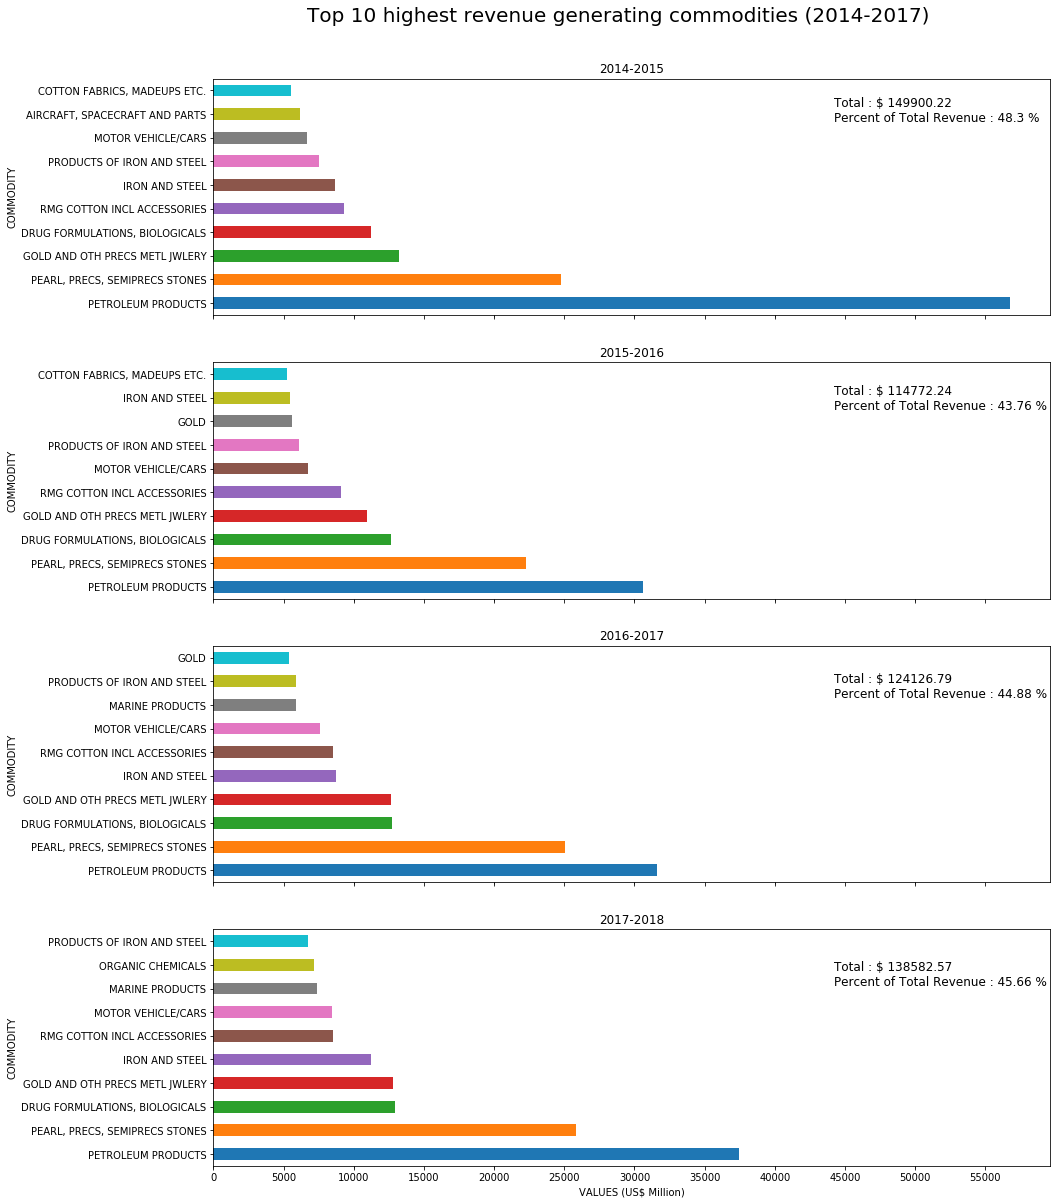

In [7]:
# Comparing Commodity wise total revenue generated for 4 years from 2014-2017
fig, ax = plt.subplots(4, 1, sharex = 'col', figsize = (15,20))
fig.suptitle('Top 10 highest revenue generating commodities (2014-2017)', y = 0.93, size = 20)
plt.xticks(np.arange(0, 60000, step = 5000))
plt.xlabel('VALUES (US$ Million)')
revenue_total1.plot(x = 'COMMODITY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[0], title = '2014-2015', legend = False)
revenue_total2.plot(x = 'COMMODITY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[1], title = '2015-2016', legend = False)
revenue_total3.plot(x = 'COMMODITY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[2], title = '2016-2017', legend = False)
revenue_total4.plot(x = 'COMMODITY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[3], title = '2017-2018', legend = False)

plt.figtext(
    .70, .85, 'Total : $ ' + str(revenue1[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue1[1]) + ' %', size = 12)
plt.figtext(
    .70, .65, 'Total : $ ' + str(revenue2[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue2[1]) + ' %', size = 12)
plt.figtext(
    .70, .45, 'Total : $ ' + str(revenue3[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue3[1]) + ' %', size = 12)
plt.figtext(
    .70, .25, 'Total : $ ' + str(revenue4[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue4[1]) + ' %', size = 12)

plt.show()

- Petroleum Products is highest revenue generating commodity for all 4 years. <br>
- The above top 10 revenue generating commodities have greater than 40 percent contribution towards total revenue for all 4 years and for year 2014-2015, it's alomst 50 %.

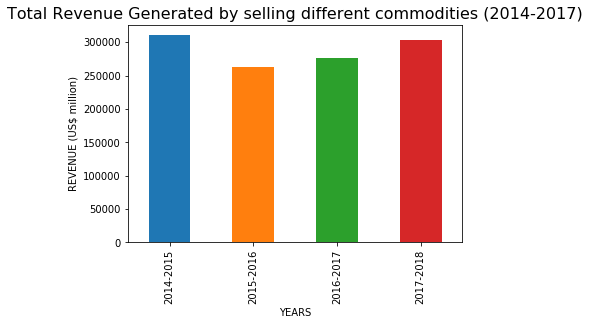

In [8]:
total_revenue.plot(x = 'Years', y = 'Revenue', kind = 'bar', legend = False)
plt.title('Total Revenue Generated by selling different commodities (2014-2017)', size = 16)
plt.xlabel('YEARS')
plt.ylabel('REVENUE (US$ million)')
plt.show()

From above graph, we can see that total revenue generated by India by selling different commodities is pretty much consistent across mentioned 4 years. There is just a small downfall in years 2015-2016 and 2016-2017.

In [9]:
print('Mean Revenue during above mentioned 4 years : {} USD'.format(total_revenue.mean()[0]))
print('Median Revenue during above mentioned 4 years : {} USD'.format(total_revenue.median()[0]))

Mean Revenue during above mentioned 4 years : 288178.08147025 USD
Median Revenue during above mentioned 4 years : 290035.0956145 USD


<h3> Let's check common commodities in top 10 revenue generating commodities among these 4 years. </h3>

In [10]:
common = set(revenue_total1['COMMODITY'].values)
common.intersection_update(set(revenue_total2['COMMODITY'].values))
common.intersection_update(set(revenue_total3['COMMODITY'].values))
common.intersection_update(set(revenue_total4['COMMODITY'].values))

In [11]:
concatenated_table = pd.concat([revenue_total1, revenue_total2, revenue_total3, revenue_total4])
total = concatenated_table.groupby(by = 'COMMODITY', as_index = False).sum().sort_values(
    by = 'VALUES (US$ million)', ascending = False)
total.columns = ['Common commodities in top 10 revenue generating commodities among 4 years', 'Revenue (US$ million)']

In [12]:
total.set_index('Common commodities in top 10 revenue generating commodities among 4 years', inplace = True)

In [13]:
common_commodity = total.loc[list(common), : ].sort_values(by = 'Revenue (US$ million)', ascending = False)

In [14]:
common_commodity

,Revenue (US$ million)
Common commodities in top 10 revenue generating commodities among 4 years,
PETROLEUM PRODUCTS,156464.273942
"PEARL, PRECS, SEMIPRECS STONES",97966.226223
GOLD AND OTH PRECS METL JWLERY,49698.789604
"DRUG FORMULATIONS, BIOLOGICALS",49470.148524
RMG COTTON INCL ACCESSORIES,35428.962378
IRON AND STEEL,34152.125943
MOTOR VEHICLE/CARS,29467.015562
PRODUCTS OF IRON AND STEEL,26382.251382


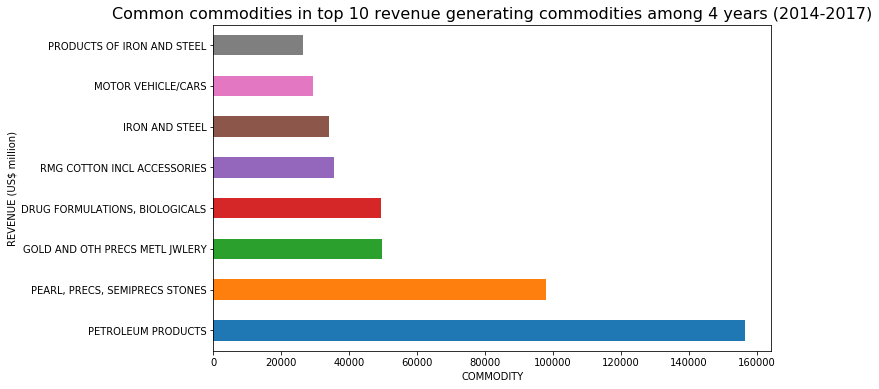

In [15]:
common_commodity.plot(y = 'Revenue (US$ million)', kind = 'barh', legend = False, figsize = (10, 6))
plt.title('Common commodities in top 10 revenue generating commodities among 4 years (2014-2017)', size = 16)
plt.xlabel('COMMODITY')
plt.ylabel('REVENUE (US$ million)')
plt.show()

The above shown 8 commodities gave maximum total revenue when summed up for 4 years. India must focus on selling these commodities more than others as they generate tremendous amount of revenue. 

<h1> Country wise analysis of Commodities and Revenue. </h1>

In [16]:
# Country wise total revenue generated for 4 years
revenue_total1 = data1[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total2 = data2[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total3 = data3[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

revenue_total4 = data4[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10).reset_index()

In [17]:
# Total and Percentage
revenue1 = [revenue_total1['VALUES (US$ million)'].sum().round(2), 
            (revenue_total1['VALUES (US$ million)'].sum()/total_revenue['Revenue'][0] * 100).round(2)]
revenue2 = [revenue_total2['VALUES (US$ million)'].sum().round(2), 
            (revenue_total2['VALUES (US$ million)'].sum()/total_revenue['Revenue'][1] * 100).round(2)]
revenue3 = [revenue_total3['VALUES (US$ million)'].sum().round(2), 
            (revenue_total3['VALUES (US$ million)'].sum()/total_revenue['Revenue'][2] * 100).round(2)]
revenue4 = [revenue_total4['VALUES (US$ million)'].sum().round(2), 
            (revenue_total4['VALUES (US$ million)'].sum()/total_revenue['Revenue'][3] * 100).round(2)]

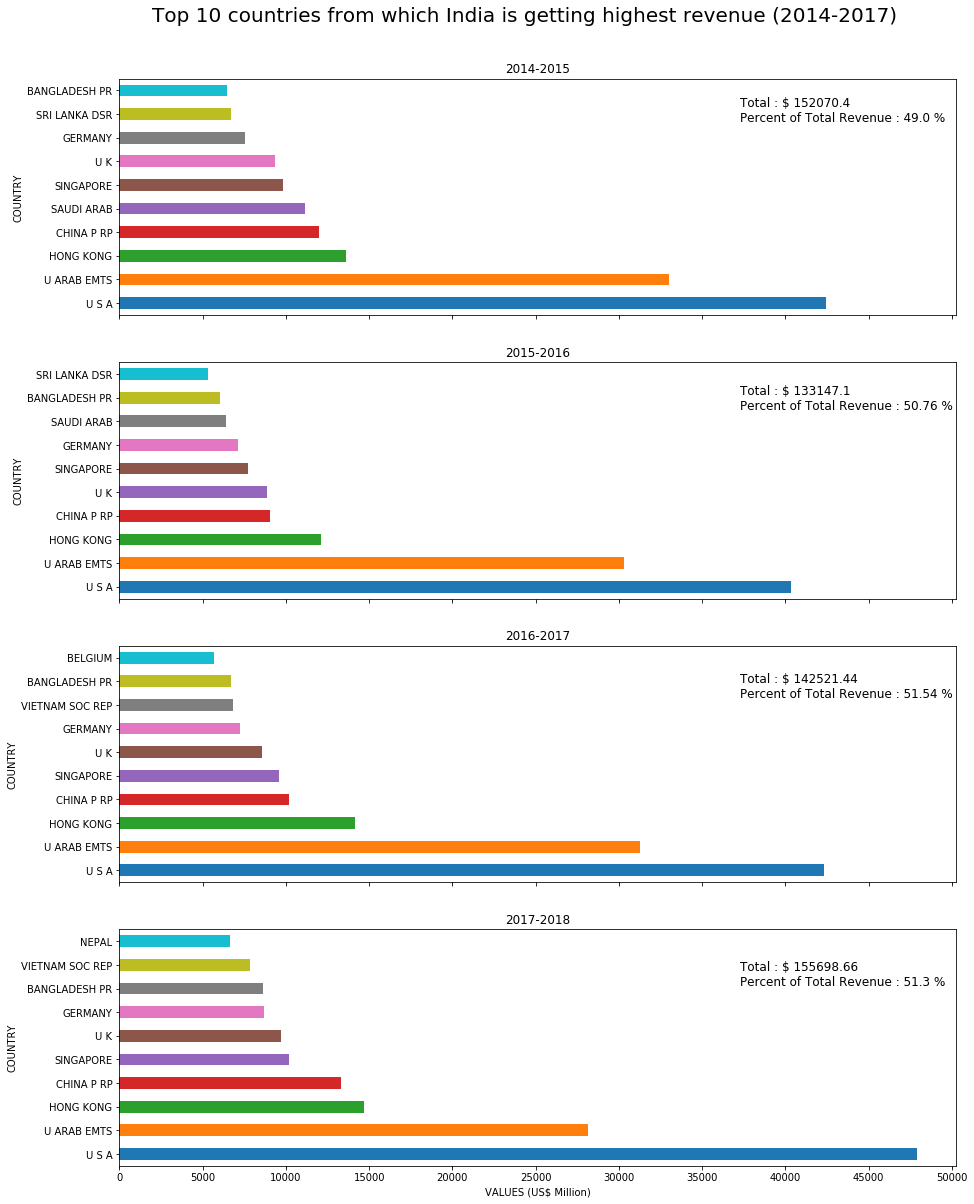

In [18]:
# Comparing Country wise total revenue generated for 4 years from 2014-2017
fig, ax = plt.subplots(4, 1, sharex = 'col', figsize = (15,20))
fig.suptitle('Top 10 countries from which India is getting highest revenue (2014-2017)', y = 0.93, size = 20)
plt.xticks(np.arange(0, 60000, step = 5000))
plt.xlabel('VALUES (US$ Million)')
revenue_total1.plot(x = 'COUNTRY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[0], title = '2014-2015', legend = False)
revenue_total2.plot(x = 'COUNTRY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[1], title = '2015-2016', legend = False)
revenue_total3.plot(x = 'COUNTRY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[2], title = '2016-2017', legend = False)
revenue_total4.plot(x = 'COUNTRY', y = 'VALUES (US$ million)', kind = 'barh', ax = ax[3], title = '2017-2018', legend = False)

plt.figtext(
    .70, .85, 'Total : $ ' + str(revenue1[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue1[1]) + ' %', size = 12)
plt.figtext(
    .70, .65, 'Total : $ ' + str(revenue2[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue2[1]) + ' %', size = 12)
plt.figtext(
    .70, .45, 'Total : $ ' + str(revenue3[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue3[1]) + ' %', size = 12)
plt.figtext(
    .70, .25, 'Total : $ ' + str(revenue4[0]) + 
    '\nPercent of Total Revenue : ' + str(revenue4[1]) + ' %', size = 12)

plt.show()

- We can see that <b>USA</b>, <b>U ARAB EMTS</b>, <b>HONG KONG</b>, <b>CHINA</b> and <b>SINGAPORE</b> are among top 5 countries for all 4 years. <br>
- From <b>USA</b> we are getting maximum revenue and for years <b>2014-2015</b>, <b>2015-2016</b> and <b>2016-2017</b> it's almost same, means there was constant demand for commodities during these years. In year <b>2017-2018</b> it's increased to around 47500 million US$. <br>
- For each year, 50% of revenue that India generated was from these top countries. 

<h3> Let's visualize how many products India sold to USA in each of the 4 years. </h3>

In [19]:
prods = pd.DataFrame(data = {
    'Years' : ['2014-2015', '2015-2016', '2016-2017', '2017-2018'],
    'Commodity Count' : [
        data1[data1['COUNTRY'] == 'U S A']['COMMODITY'].value_counts().count(),
        data2[data2['COUNTRY'] == 'U S A']['COMMODITY'].value_counts().count(),
        data3[data3['COUNTRY'] == 'U S A']['COMMODITY'].value_counts().count(),
        data4[data4['COUNTRY'] == 'U S A']['COMMODITY'].value_counts().count()
    ]
})

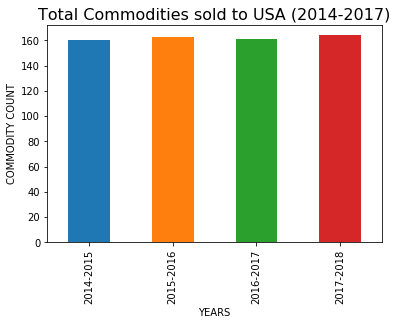

In [20]:
prods.plot(x = 'Years', y = 'Commodity Count', kind = 'bar', legend = False)
plt.title('Total Commodities sold to USA (2014-2017)', size = 16)
plt.xlabel('YEARS')
plt.ylabel('COMMODITY COUNT')
plt.show()

India sold almost same number of quantities to USA in all 4 years. It means that USA is permanent buyer of these quantities. Also, since the number for each year is almost same, we can say that on a bigger level that same type of quantities were sold during these years.

<h3> Let's see the common countires which are in top 10 revenue giving countires among each year. </h3>

In [21]:
common = set(revenue_total1['COUNTRY'].values)
common.intersection_update(set(revenue_total2['COUNTRY'].values))
common.intersection_update(set(revenue_total3['COUNTRY'].values))
common.intersection_update(set(revenue_total4['COUNTRY'].values))

In [22]:
concatenated_table = pd.concat([revenue_total1, revenue_total2, revenue_total3, revenue_total4])
total = concatenated_table.groupby(by = 'COUNTRY', as_index = False).sum().sort_values(
    by = 'VALUES (US$ million)', ascending = False)
total.columns = ['Common Countries in top 10 countries among 4 years', 'Revenue (US$ million)']

In [23]:
total.set_index('Common Countries in top 10 countries among 4 years', inplace = True)

In [24]:
common_country = total.loc[list(common), : ].sort_values(by = 'Revenue (US$ million)', ascending = False)

In [25]:
common_country

,Revenue (US$ million)
Common Countries in top 10 countries among 4 years,
U S A,173018.252772
U ARAB EMTS,122721.859627
HONG KONG,54539.546673
CHINA P RP,44509.782927
SINGAPORE,37299.644000
U K,36505.527528
GERMANY,30568.467205
BANGLADESH PR,27794.686128


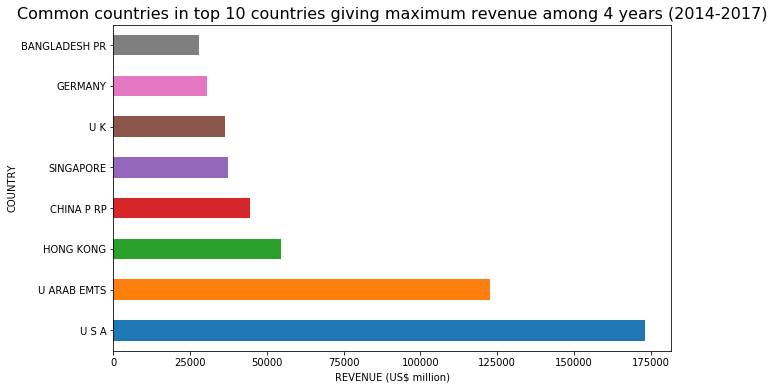

In [26]:
common_country.plot(y = 'Revenue (US$ million)', kind = 'barh', legend = False, figsize = (10, 6))
plt.title('Common countries in top 10 countries giving maximum revenue among 4 years (2014-2017)', size = 16)
plt.xlabel('REVENUE (US$ million)')
plt.ylabel('COUNTRY')
plt.show()

<h3> Let's check the number of common commodities in top 10 countries, among 4 years. </h3>

In [27]:
# Storing top 10 countires for each year in different variables
country_list1 = revenue_total1['COUNTRY'].values
country_list2 = revenue_total2['COUNTRY'].values
country_list3 = revenue_total3['COUNTRY'].values
country_list4 = revenue_total4['COUNTRY'].values

In [28]:
# Function returning common commodities count for each year
def common_commodity_count(x):
    count = 0
    commodities = []
    for i in range(len(x)):
        commodities.append(data1[data1['COUNTRY'] == x[i]]['COMMODITY'].values)
    
    list_of_sets = [set(val) for val in commodities]
    
    for i in range(1, len(list_of_sets)):
        list_of_sets[0].intersection_update(list_of_sets[i])
        
    count = len(list_of_sets[0])
    # print(list_of_sets[0]) For debugging purpose
    return count

commodity_counts = [
    common_commodity_count(country_list1),
    common_commodity_count(country_list2),
    common_commodity_count(country_list3),
    common_commodity_count(country_list4)
]

In [29]:
common_prods = pd.DataFrame(data = {
    'Years' : ['2014-2015', '2015-2016', '2016-2017', '2017-2018'],
    'Common_Commodities_Count' : commodity_counts
})

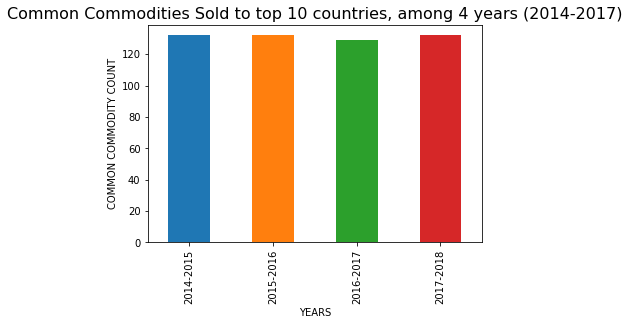

In [30]:
common_prods.plot(x = 'Years', y = 'Common_Commodities_Count', kind = 'bar', legend = False)
plt.title('Common Commodities Sold to top 10 countries, among 4 years (2014-2017)', size = 16)
plt.xlabel('YEARS')
plt.ylabel('COMMON COMMODITY COUNT')
plt.show()

The common commodities sold to top 10 countries are almost same. This means that these commodities are giving maximum revenue and there are consumer countries who regularly brought these commodities from India.

<h3> Let's also check how many country wise common commodities were sold in these 4 years. </h3> 

In [31]:
# Function returning set of common commodity names
def common_commodity_names(x):
    commodities = []
    for i in range(len(x)):
        commodities.append(data1[data1['COUNTRY'] == x[i]]['COMMODITY'].values)
    
    list_of_sets = [set(val) for val in commodities]
    
    for i in range(1, len(list_of_sets)):
        list_of_sets[0].intersection_update(list_of_sets[i])
        
    # print(list_of_sets[0]) For debugging purpose
    return list_of_sets[0]

common = common_commodity_names(country_list1)
common.intersection_update(common_commodity_names(country_list2))
common.intersection_update(common_commodity_names(country_list3))
common.intersection_update(common_commodity_names(country_list4))

In [32]:
pd.DataFrame(data = {
    'Common Commodities sold to top 10 countries giving highest revenue among 4 years' : list(common)
})

,Common Commodities sold to top 10 countries giving highest revenue among 4 years
0,"ALUMINIUM, PRODUCTS OF ALUMINM"
1,"NUCLER REACTR, INDL BOILR, PRT"
2,MACHINE TOOLS
3,PACKAGING MATERIALS
4,OTHER CONSTRUCTION MACHINERY
5,"PAINT, VARNISH AND ALLID PRODC"
6,OPTICAL ITEMS (INCL.LENS ETC)
7,"BULK DRUGS, DRUG INTERMEDIATES"
8,SESAME SEEDS
9,TELECOM INSTRUMENTS


The above table shows common commodities which were sold in 4 years to top 10 countries giving maximum revenue. In order to increase revenue or maintain the revenue foothold in top countries, India must maintain good quantity and quality of these commodities. 